In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/yuezheli/COVIDpred/main/CleanedData.csv', header = 0)

dataframe['Date'] = pd.to_datetime(dataframe['Date'])

dataframe.head()

,confirmed,death,state,Date
0,0,0,Alabama,2020-01-22
1,0,0,Alabama,2020-01-23
2,0,0,Alabama,2020-01-24
3,0,0,Alabama,2020-01-25
4,0,0,Alabama,2020-01-26


In [3]:
# use Connecticut data 
ct = dataframe[dataframe['state'] == 'Connecticut']

newconfirmed= np.zeros([len(ct)])
newdeath = np.zeros([len(ct)])

for i in range(len(ct)-1):
    newconfirmed[i+1] = ct['confirmed'].iloc[i+1] - ct['confirmed'].iloc[i] 
    newdeath[i+1] = ct['death'].iloc[i+1] - ct['death'].iloc[i] 

ct['added confirmed'] = newconfirmed
ct['added death'] = newdeath

ct.set_index('Date', drop = True, inplace = True)

ct.head()


c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,confirmed,death,state,added confirmed,added death
Date,,,,,
2020-01-22,0,0,Connecticut,0.0,0.0
2020-01-23,0,0,Connecticut,0.0,0.0
2020-01-24,0,0,Connecticut,0.0,0.0
2020-01-25,0,0,Connecticut,0.0,0.0
2020-01-26,0,0,Connecticut,0.0,0.0


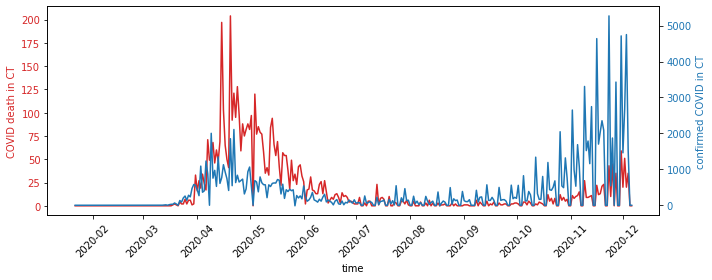

In [8]:
fig, ax1 = plt.subplots(figsize = (10,4))

ax1.set_xlabel('time (s)')
ax1.set_ylabel('COVID death in CT', color='tab:red')
ax1.plot(ct['added death'], label = 'death', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
plt.xlabel('time'), plt.ylabel('COVID death in CT'), plt.xticks(rotation = 45)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('confirmed COVID in CT', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(ct['added confirmed'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()

# gradually, dealth rate decreases, especially after October

# look for correlation between confirmed cases and death

In [9]:
ct['added confirmed'].corr(ct['added death'])

0.36881142018264046

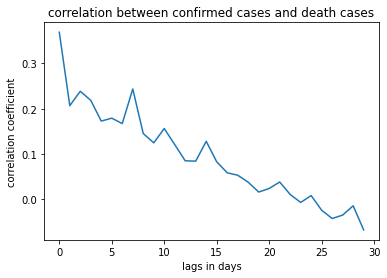

In [39]:
xcorrlag = []
for daylag in range(30):
    ct_shift = ct.shift(daylag)
    tmp = ct['added confirmed'].corr(ct_shift['added death'])
    xcorrlag.append(tmp)
    del tmp



plt.plot(xcorrlag)
plt.xlabel('lags in days'), plt.ylabel('correlation coefficient'), plt.title('correlation between confirmed cases and death cases')
plt.show()

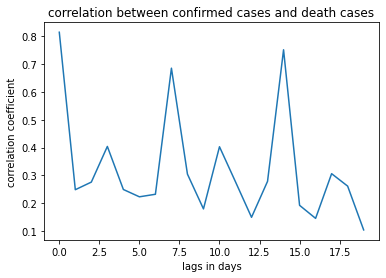

In [35]:
afterjuly = ct[ct.index > '2020-07-01'] # assuming confirmed cases are more accurate after July due to increase in testing capacity

julycorr = []
for daylag in range(20):
    afterjuly_shift = afterjuly.shift(daylag)
    tmp = afterjuly['added confirmed'].corr(afterjuly_shift['added death'])
    julycorr.append(tmp)
    del tmp

plt.plot(julycorr)
plt.xlabel('lags in days'), plt.ylabel('correlation coefficient'), plt.title('correlation between confirmed cases and death cases')
plt.show()


In [40]:
pd.DataFrame(julycorr, columns = ['days lag'])
# around 14 days delay in confirmed cases and death cases since July;

,days lag
0,0.814336
1,0.248933
2,0.276238
3,0.404275
4,0.249690
5,0.223414
6,0.232542
7,0.685311
8,0.304865
9,0.180015
